In [ ]:
import pickle
import numpy as np
import plotly.graph_objects as go
import sys
import math

binned_fasta_spectrum = pickle.load(open("binned_fasta_spectrum.pkl", "rb"))
binned_mzml_spectrum = pickle.load(open("binned_mzmL_spectrum.pkl", "rb"))


In [ ]:
# fig = go.Figure()
# fig.add_trace(go.Bar(x=np.arange(0, len(binned_fasta_spectrum), 0.02), y=binned_fasta_spectrum, width=3, marker_color='blue'))
# fig.add_trace(go.Bar(x=np.arange(0, len(binned_fasta_spectrum), 0.02), y=binned_mzml_spectrum  * -1, width=3, marker_color='crimson'))

# fig.write_image("pfui.svg")
# fig.write_html("pfui.html")

In [ ]:
SHIFT = 1.0

binned_fasta_spectrum_cut = binned_fasta_spectrum[int(200/0.02):int(2000/0.02)]

binned_mzml_spectrum_cut = binned_mzml_spectrum[int(200/0.02):int(2000/0.02)]

top_100_values = np.argsort(binned_mzml_spectrum_cut)[-100:]
binned_mzml_spectrum_100 = np.zeros_like(binned_mzml_spectrum_cut)
binned_mzml_spectrum_100[top_100_values] = binned_mzml_spectrum_cut[top_100_values]

binned_mzml_spectrum_shift = np.insert(binned_mzml_spectrum_100, 0, np.zeros(int(SHIFT / 0.02)))
binned_mzml_spectrum_shift = np.append(binned_mzml_spectrum_shift, np.zeros(int(SHIFT / 0.02)))

corr = np.correlate(binned_fasta_spectrum_cut, binned_mzml_spectrum_shift, mode="valid")


corr[len(corr) // 2] - np.mean(corr)


In [ ]:
np.printoptions(threshold=sys.maxsize)
for idx, i in enumerate(corr):
    print(idx, i)

In [ ]:
binned_mzml_spectrum_cut = binned_mzml_spectrum[int(200/0.02):int(2000/0.02)]

top_100_values = np.argsort(binned_mzml_spectrum_cut)[-100:]
binned_mzml_spectrum_100 = np.zeros_like(binned_mzml_spectrum_cut)
binned_mzml_spectrum_100[top_100_values] = binned_mzml_spectrum_cut[top_100_values]

np.sort(np.argsort(binned_mzml_spectrum_100)[-100:] / 50)



In [ ]:
import pickle
import numpy as np

spectrum = pickle.load(open("scan_42578_spectrum.pkl", "rb"))

print(spectrum)

In [ ]:
import pickle
import sys
import numpy as np
sys.path.append("../")
from Search.utils import fragments
from Search.binning import binning

mz_array, int_array = pickle.load(open("spectrum_71120.pkl", "br"))



In [ ]:
spect01 = binning(mz_array, np.sqrt(int_array))

highest_ion = spect01.size 
num_wins = 10
win_size = int(highest_ion/num_wins) + 1


spect02 = np.array([]) 

for i in range(0, len(spect01), win_size): 
    win = spect01[i:i + win_size]
    win = 50 * (win  / np.max(win))
    spect02 = np.append(spect02, win)
    

for i, n in enumerate(spect02):
    if n > 0:
        print(i, n)

In [ ]:
spct = binning(mz_array, int_array)
for i, n in enumerate(spct):
    if n>0:
        print(i, n)

In [ ]:
print([i for i in fasta_array if i > 0])

In [ ]:
import numpy as np

print(np.correlate(mzml_array, fasta_array))

In [ ]:
import numpy as np
mzml_array = np.array([12, 56, 199, 201, 250, 300, 400, 700, 2001, 2050])
int_array = np.array([2, 3, 6, 8, 9, 2, 90, 4, 56, 35])



In [ ]:
print(0.01 / 0.02)

In [ ]:
for cnt in range(1, min(4, 3) + 1):
    print(cnt)


In [ ]:
import sys
import matplotlib.pyplot as plt
sys.path.append("../")

import numpy as np

plt.figure(dpi=1200)

# make data
x = 0.5 + np.arange(8)
y = [4.8, 5.5, 3.5, 4.6, 6.5, 6.6, 2.6, 3.0]

# plot
fig, ax = plt.subplots()

ax.stem(x, y)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

In [ ]:
from Search.utils import fragments
import math

mz, intensity, pep , scan = pickle.load(open("scan_71120.pkl", "br"))
#print(mz, intensity, scan)

fragment_mz = sorted(list(fragments(pep, maxcharge=2)), key= float)

for idx, mass in enumerate(mz):
    if  mass < 200 or mass > 2000:
        intensity[idx] = 0.0

intensity = intensity  / np.max(intensity)
top_hundred_intensities = -np.sort(-intensity)#[:min(100, intensity.size)]

match_count = 0

xcorr = 0

for m, i in zip(mz, intensity):
    
    match = 0
    if i in top_hundred_intensities and 200 <= m <= 2000:
        for f in fragment_mz:
            if 0.02 >= abs(f - m):
                match = f
                match_count += 1

                if int(m // 0.02) == int(match // 0.02):
                    xcorr += i
                else:
                    xcorr += i/2
                break

    print([m, i, match, int(m // 0.02), int(match // 0.02)])
    

print(match_count, xcorr)




In [ ]:
from itertools import combinations

pept = "CIFFWWCYGMKGCMCL"
m_pos = [pos for pos, char in enumerate(pept) if char == 'M']

for len in range(4):
	for i in combinations(m_pos, len):
		print(list(i))



In [ ]:
from pyteomics.parser import isoforms, parse

variable_mods = {"m" : ["M"]}
fixed_mods = {"c" : ["C"]}

for i in isoforms(pept, variable_mods=variable_mods, fixed_mods=fixed_mods, max_mods=3):
    print(i)




In [ ]:
from pyteomics import mass

variable_mods = {"[oxid]" : ["M"]}
fixed_mods = {"[carb]" : ["C"]}

mass.std_aa_comp['[oxid]'] = mass.Composition({'O': 1})
mass.std_aa_comp['[carb]'] = mass.Composition({'H': 3, 'C' : 2, 'N' : 1, 'O' : 1})

mass.std_aa_mass['[oxid]M'] = 15.994915
mass.std_aa_mass['[carb]C'] = 57.021464

pep1 = "GLTEGLHGF[carb]CHVHEFGDNTAG"


print(mass.fast_mass2(pep1, charge=3))

In [ ]:
import sys
from pyteomics import mass
sys.path.append("../")
from Search.utils import fragments

variable_mods = {"[oxid]" : ["M"]}
fixed_mods = {"[carb]" : ["C"]}

mass.std_aa_comp['[oxid]'] = mass.Composition({'O': 1})
mass.std_aa_comp['[carb]'] = mass.Composition({'H': 3, 'C' : 2, 'N' : 1, 'O' : 1})

peptide = "ALSDHHIYLEGTLLKPN[oxid]MVTPGHA[carb]CTQK"

print(list(fragments(peptide, maxcharge=3)))

In [ ]:
from Search.predicted_spect import predict_spectrum



pepppppp = "ALSDHHIYLEGTLLKPN[oxid]MVTPGHA[carb]CTQK"
print(predict_spectrum(pepppppp, 4))



In [ ]:
from pyteomics import mzml, auxiliary

mzml_reader = mzml.read("../LFQ_Orbitrap_DDA_Human_01.mzML")

for i in mzml_reader:
    if i["ms level"] == 2:
        auxiliary.print_tree(i)


In [ ]:
import pandas as pd

res_1 = pd.read_csv('/home/zusman/Documents/xcorr-reimplementation/Results/LFQ_Orbitrap_DDA_Human_01_ps=False_result_nofilter.tsv', sep='\t', header=0)
res_2 = pd.read_csv("/home/zusman/micha/bioinfo/Comet/LFQ_Orbitrap_DDA_Human_01.tsv" , sep='\t', header=0)

res_1.sort_values(by="xcorr", ascending=False, inplace=True)
res_2.sort_values(by="xcorr", ascending=False, inplace=True)

res_1.drop_duplicates(subset="scan", inplace=True)
res_2.drop_duplicates(subset="scan", inplace=True)

join = res_1.join(res_2.set_index("scan"), on=["scan"], how="inner", lsuffix="_python")


join[["xcorr_python", "xcorr"]]

#join.plot.scatter("xcorr_python", "xcorr", xlabel="Python Xcorr", ylabel="Comet Xcorr", color="black", s=1, figsize = (10, 10))



<Axes: xlabel='Theoretical Xcorr', ylabel='Predicted Xcorr'>

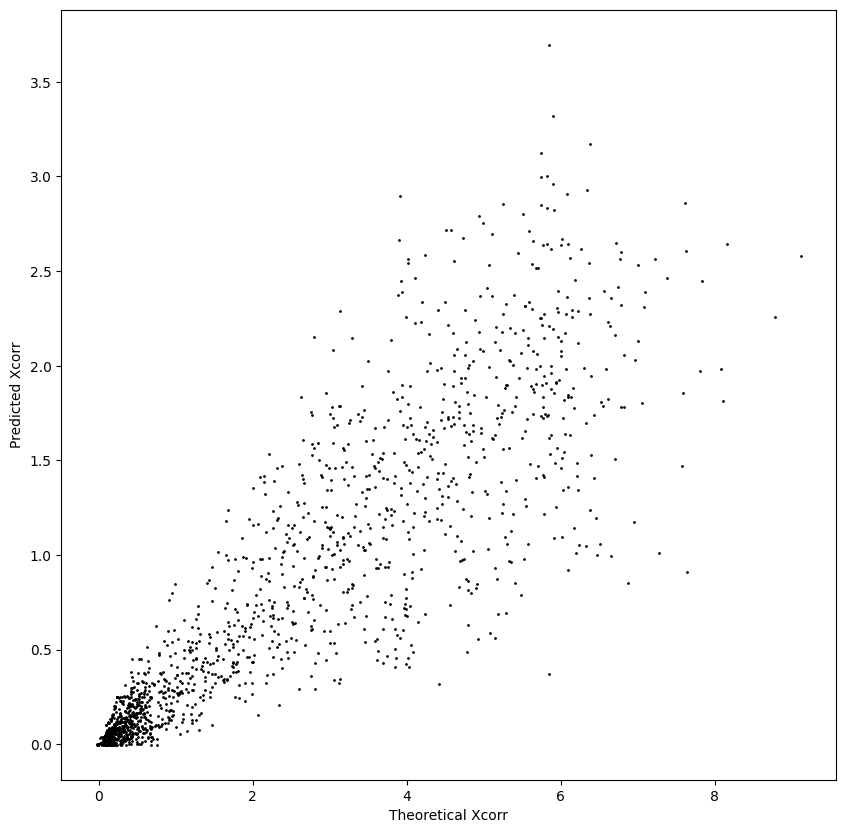

In [3]:
import pandas as pd

res_1 = pd.read_csv('/home/ubuntu/micha/xcorr-reimplementation/Results/LFQ_Orbitrap_DDA_Human_01_ps=False_result.tsv', sep='\t', header=0)
res_2 = pd.read_csv('/home/ubuntu/micha/xcorr-reimplementation/Results/LFQ_Orbitrap_DDA_Human_01_ps=True_result.tsv', sep='\t', header=0)

res_1.sort_values(by="xcorr", ascending=False, inplace=True)
res_2.sort_values(by="xcorr", ascending=False, inplace=True)

res_1.drop_duplicates(subset="scan", inplace=True)
res_2.drop_duplicates(subset="scan", inplace=True)

join = res_1.join(res_2.set_index("scan"), on=["scan"], how="inner", lsuffix="_predicted")

table = join[["scan", "xcorr_predicted", "xcorr"]]
table.to_csv('/home/ubuntu/micha/xcorr-reimplementation/Results/table_theo_pred.tsv',sep='\t', index=False, header=["scan", "xcorr_theo", "xcorr_predicted"])

join[["xcorr_predicted", "xcorr"]].plot.scatter("xcorr_predicted", "xcorr", xlabel="Theoretical Xcorr", ylabel="Predicted Xcorr", color="black", s=1, figsize = (10, 10))

In [ ]:
import sys
sys.path.append("../")

from pyteomics import parser
from ms2pip.core import predict_single
from ms2pip.core import Peptidoform
import numpy as np

from Search.predicted_spect import predict_spectrum


peptide = parser.parse("LLKPN[oxid]GHA[carb]CTQK")
proforma_seq = parser.to_proforma(peptide) + "/5"
peptidoform = Peptidoform(proforma_seq)
result = predict_single(peptidoform)

mz = result.theoretical_mz
intensity = result.predicted_intensity

mz = np.array([])
